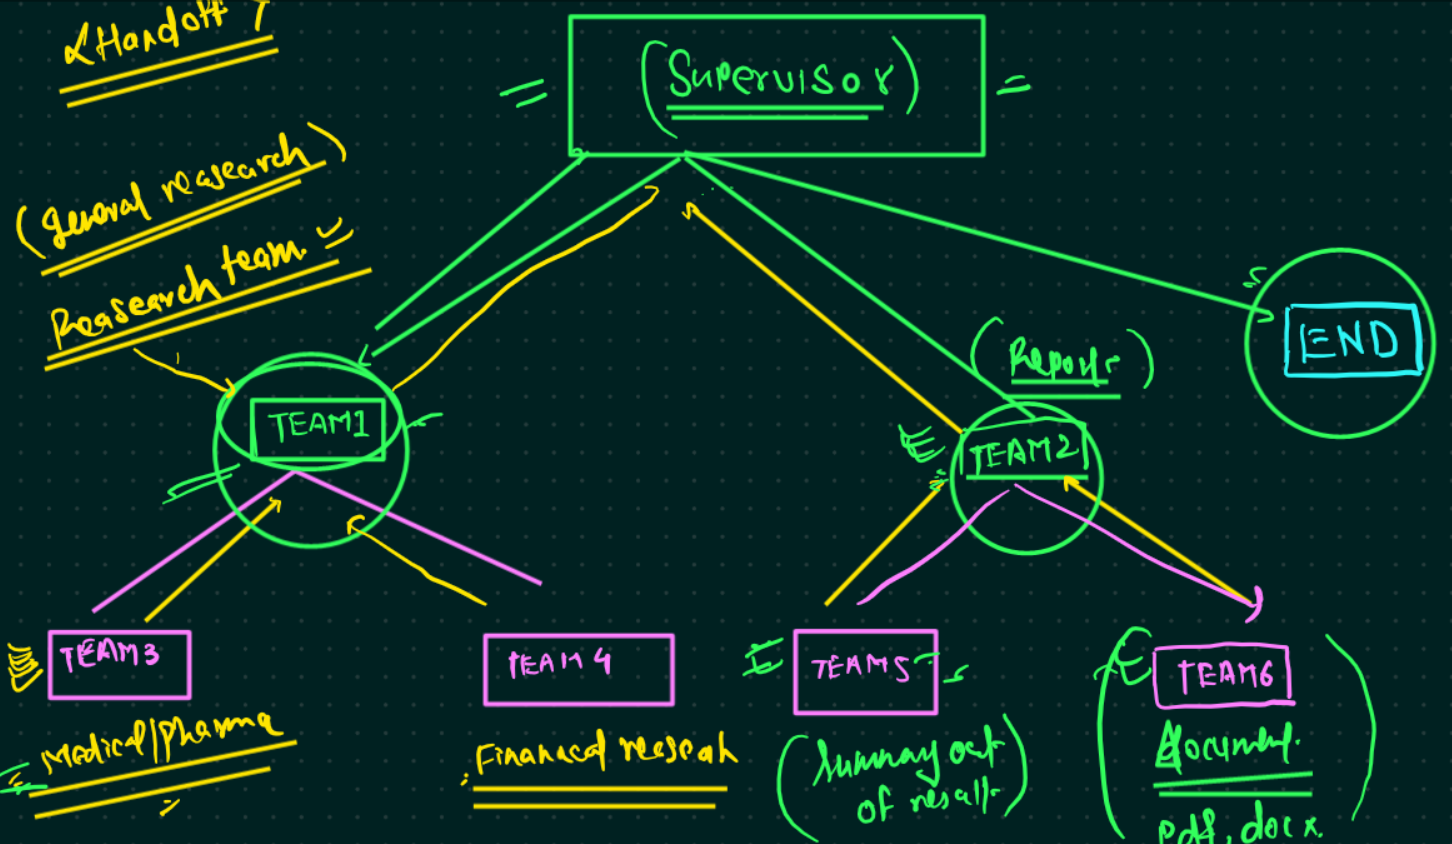

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [5]:
llm.invoke("hello")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.077178184, 'prompt_time': 0.003411383, 'queue_time': 0.053905557, 'total_time': 0.080589567}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f1a90f15-fb8d-4782-ba20-789552d37641-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [3]:
from typing import TypedDict,Sequence,Annotated
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
def AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [ ]:
# from langchain_core.tools import tool
# from langchain_core.prompts import PromptTemplate
# from langchain_core.output_parsers import StrOutputParser
# @tool
# def medical_researcher(query:str):
#     """
#     Perform research on a medical or pharmaceutical topic based on the user's query.
    
#     This tool takes a natural language question or keyword related to medicine, 
#     diseases, treatments, drugs, or clinical procedures and returns relevant 
#     information, summaries, or references from scientific literature or medical databases.
    
#     Example: "What are the latest treatments for Alzheimer's disease?"
#     """
#     template="""You are a helpful and knowledgeable medical research assistant. 
#         Your task is to provide accurate, up-to-date, and concise medical or pharmaceutical 
#         information based on user queries. Use scientific terminology when appropriate, 
#         but keep explanations understandable for educated non-experts.

#         Question: {query}
#         Answer:"""
#     parser=StrOutputParser()
#     base_prompt = PromptTemplate(template=template,
#                                  input_variables=["query"]
#                                  )
#     chain=base_prompt | llm | parser
    
#     raw_output=chain.invoke({"query":query})
#     if "</think>" in raw_output:
#         answer = raw_output.split("</think>")[-1].strip()
#     else:
#         answer = raw_output.strip()
#     return answer


In [ ]:

# @tool
# def finance_researcher(query:str):
#     """
#     Perform research on a medical or pharmaceutical topic based on the user's query.
    
#     This tool takes a natural language question or keyword related to medicine, 
#     diseases, treatments, drugs, or clinical procedures and returns relevant 
#     information, summaries, or references from scientific literature or medical databases.
    
#     Example: "What are the latest treatments for Alzheimer's disease?"
#     """
#     template="""You are a helpful and knowledgeable finance research assistant. 
#         Your task is to provide accurate, up-to-date, and concise medical or pharmaceutical 
#         information based on user queries. Use scientific terminology when appropriate, 
#         but keep explanations understandable for educated non-experts.

#         Question: {query}
#         Answer:"""
#     parser=StrOutputParser()
#     base_prompt = PromptTemplate(template=template,
#                                  input_variables=["query"]
#                                  )
#     chain=base_prompt | llm | parser
    
#     raw_output=chain.invoke({"query":query})
#     if "</think>" in raw_output:
#         answer = raw_output.split("</think>")[-1].strip()
#     else:
#         answer = raw_output.strip()
#     return answer

In [4]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\pavan\AppData\Local\Temp\ipykernel_22864\156554669.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


### Medical researcher

In [5]:
from langgraph.prebuilt import create_react_agent
medical_agent = create_react_agent(llm, 
                                   tools=[search_tool],
                                   name="medical_researcher",
                                   prompt="You are a world class medical researcher with access to web search.")

In [6]:
medical_agent.invoke(
    {"messages": [{"role": "user", "content": "I have cough what are the medicines I need to take"}]}
)

{'messages': [HumanMessage(content='I have cough what are the medicines I need to take', additional_kwargs={}, response_metadata={}, id='d60d9daf-12be-4af0-8235-80ba16fd7d12'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking about what medicines they should take for a cough. First, I need to figure out the best way to help them. They mentioned they\'re a world-class medical researcher with access to web search, so they probably want accurate and up-to-date information.\n\nI remember the tools available include the tavily_search_results_json function, which is good for comprehensive searches. I should use that to get reliable results. The user\'s query is about cough medicines, so I\'ll structure the search query to focus on over-the-counter options and any specific medications that might be recommended.\n\nI need to make sure the search is clear and relevant. Maybe include terms like "best cough medicines" or "over-the-counter cough treatmen

### Finance Researcher

In [7]:
from langchain_core.tools import tool
import yfinance as yf

In [8]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [ ]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $212.44.'

In [9]:
from langgraph.prebuilt import create_react_agent

finance_agent=create_react_agent(llm, 
                                   tools=[search_tool,get_stock_price],
                                   name="finance_researcher",
                                   prompt="You are a world class finance researcher with access to web search and stock price retrieval tool." 
)

In [37]:
finance_agent.invoke({"messages": ["Give me the last closing price of Tesla (TSLA), and also provide the latest news or market trends that might have influenced its price."]})

{'messages': [HumanMessage(content='Give me the last closing price of Tesla (TSLA), and also provide the latest news or market trends that might have influenced its price.', additional_kwargs={}, response_metadata={}, id='0953e9ea-266d-42c8-b392-861cb8749bb8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking for the last closing price of Tesla stock, which is TSLA, and also wants to know the latest news or market trends that might have affected its price. I need to figure out how to provide this information accurately.\n\nFirst, I should probably use the get_stock_price tool to fetch the closing price. That seems straightforward. I\'ll just call that function with the ticker "TSLA" and it should give me the price.\n\nNext, for the news or market trends part, I\'ll need to search for recent articles or updates related to Tesla. Maybe I can use the tavily_search_results_json tool for that. I\'ll need to construct a good search query to get rel

### Supervisor

In [10]:
from langgraph_supervisor import create_supervisor

In [11]:
workflow = create_supervisor(
    [medical_agent, finance_agent],
    model=llm,
    prompt=(
        "You are a team supervisor managing a medical researcher and a finance researcher. "
        "For getting the medical related information, use medical researcher."
        "For getting the finance related information, use finance researcher"
    )
)


In [36]:
research_team=workflow.compile(name='research_team')

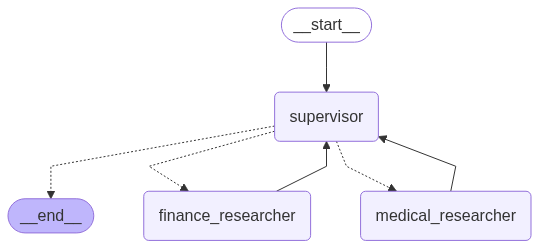

In [37]:
from IPython.display import Image

display(Image(research_team.get_graph().draw_mermaid_png()))

### Summarizer agent

In [ ]:
@tool
def summarize_text(text: str) -> str:
    """Summarizes the given text into a concise form."""
    prompt = f"Summarize the following in bullet points:\n\n{text}"
    return llm.invoke(prompt)

In [17]:
from langgraph.prebuilt import create_react_agent

summarizer_agent = create_react_agent(
    llm,
    tools=[summarize_text], 
    name="summarizer_agent",
    prompt="You are a world-class summarizer. Given a long text, summarize it concisely and clearly."
)

In [18]:
from langchain_core.messages import HumanMessage,AIMessage,ToolMessage
query={'messages': [HumanMessage(content='Give me the last closing price of Tesla (TSLA), and also provide the latest news or market trends that might have influenced its price.', additional_kwargs={}, response_metadata={}, id='0953e9ea-266d-42c8-b392-861cb8749bb8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking for the last closing price of Tesla stock, which is TSLA, and also wants to know the latest news or market trends that might have affected its price. I need to figure out how to provide this information accurately.\n\nFirst, I should probably use the get_stock_price tool to fetch the closing price. That seems straightforward. I\'ll just call that function with the ticker "TSLA" and it should give me the price.\n\nNext, for the news or market trends part, I\'ll need to search for recent articles or updates related to Tesla. Maybe I can use the tavily_search_results_json tool for that. I\'ll need to construct a good search query to get relevant results. Something like "latest news Tesla stock price" or "Tesla market trends" might work.\n\nWait, but the user specifically wants the latest news that might have influenced the price. So perhaps the search query should be more focused, like "Tesla stock price factors" or "recent events affecting TSLA". That might yield better results.\n\nI should also consider the timing of the news. The stock price is the previous closing price, so the news should be from the last few days to be relevant. Maybe include a time filter in the search, but I\'m not sure if the tool allows that. If not, I\'ll have to rely on the search results to provide the most recent information.\n\nAfter I get the news results, I\'ll need to summarize them or pick out the key points that could have influenced the stock price. Things like earnings reports, product launches, regulatory issues, or market trends in the electric vehicle sector.\n\nI should also cross-reference the news with the stock price movement. If the price went up or down, the news should reflect why that happened. For example, positive earnings could cause an increase, while bad news like a product recall might cause a drop.\n\nI wonder if there\'s any major news about Tesla recently. Maybe they announced a new model, or there\'s something about their production numbers. It\'s important to find the most impactful news items that would have moved the market.\n\nAlso, I should consider the reliability of the sources. The search tool is supposed to provide trusted results, so that should help in getting accurate information.\n\nOnce I have both the stock price and the relevant news, I\'ll present them together in a clear and concise manner. Maybe start with the stock price and then discuss the factors that influenced it based on the news.\n\nI should also make sure to format the response correctly, using the tool calls as specified. So first, call get_stock_price with TSLA, then use the search tool with the appropriate query to get the news.\n\nHmm, I hope the search results include enough information. If not, maybe I\'ll need to adjust the search query to get more relevant data. But for now, I\'ll proceed with the initial plan.\n\nAlright, time to make the tool calls and compile the information.\n', 'tool_calls': [{'id': 'zd6ys04kz', 'function': {'arguments': '{"ticker":"TSLA"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 881, 'prompt_tokens': 302, 'total_tokens': 1183, 'completion_time': 3.595153469, 'prompt_time': 0.01918203, 'queue_time': 0.05792377, 'total_time': 3.614335499}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, name='finance_researcher', id='run--263b1222-f5fc-43db-908c-854ade8048c1-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'TSLA'}, 'id': 'zd6ys04kz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 302, 'output_tokens': 881, 'total_tokens': 1183}),
  ToolMessage(content='The last closing price of TSLA was $315.65.', name='get_stock_price', id='f2344d2f-175a-4cc6-bad9-d55f58898568', tool_call_id='zd6ys04kz'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user asked for the last closing price of Tesla (TSLA) and also wanted the latest news or market trends that might have influenced its price. I first used the get_stock_price tool to fetch the closing price, which came back as $315.65. Now, I need to find relevant news or trends. \n\nI should consider what factors typically affect Tesla\'s stock price. Recent earnings reports, product launches, regulatory issues, or market trends in the electric vehicle sector could be relevant. I\'ll use the tavily_search_results_json tool to search for the latest news on Tesla. \n\nI\'ll phrase the search query as "latest news Tesla stock price trends" to get comprehensive results. This should provide me with up-to-date information on what\'s impacting TSLA\'s price. \n\nOnce I have the search results, I\'ll analyze them to identify key factors. For example, if there\'s news about a new model release or battery technology advancements, that\'s positive. Conversely, any regulatory issues or supply chain problems could be negative influences. \n\nI\'ll then compile this information into a clear, concise response for the user, explaining how these factors might have influenced the stock price. This way, the user gets both the closing price and the context around it.\n', 'tool_calls': [{'id': '46pbdqa2g', 'function': {'arguments': '{"query":"latest news Tesla stock price trends"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 286, 'prompt_tokens': 367, 'total_tokens': 653, 'completion_time': 1.293804876, 'prompt_time': 0.023976463, 'queue_time': 0.057463446, 'total_time': 1.317781339}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, name='finance_researcher', id='run--5ae5a003-1acf-4d1f-90a5-83ea76ddd072-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest news Tesla stock price trends'}, 'id': '46pbdqa2g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 367, 'output_tokens': 286, 'total_tokens': 653}),
  ToolMessage(content='[{"title": "Tesla (TSLA) Stock Forecast & Price Prediction 2025–2030", "url": "https://coincodex.com/stock/TSLA/price-prediction/", "content": "According to our current TSLA stock forecast, the value of Tesla shares will drop by -3.13% and reach $ 313.64 per share by July 28, 2025.", "score": 0.70823324}, {"title": "Tesla Inc (TSLA) Stock Price & News - Google Finance", "url": "https://www.google.com/finance/quote/TSLA:NASDAQ?hl=en", "content": "Previous close. The last closing price. $315.65 ; Day range. The range between the high and low prices over the past day. $312.76 - $318.45 ; Year range. The", "score": 0.6854659}, {"title": "TSLA Stock Price — Tesla Chart - TradingView", "url": "https://www.tradingview.com/symbols/NASDAQ-TSLA/", "content": "The current price of TSLA is 313.63 USD — it has increased by 4.97% in the past 24 hours. Watch Tesla stock price performance more closely on the chart.", "score": 0.65676886}, {"title": "Tesla, Inc. (TSLA) Stock Price, News, Quote & History - Yahoo Finance", "url": "https://finance.yahoo.com/quote/TSLA/", "content": "125,665\\n\\n### Full Time Employees\\n\\nDecember 31\\n\\n### Fiscal Year Ends\\n\\nConsumer Cyclical\\n\\n### Sector\\n\\nAuto Manufacturers\\n\\n### Industry\\n\\n### Recent News: TSLA\\n\\nTesla\'s robotaxi: Analyst\'s two highlights from the launch\\n\\n### Tesla\'s robotaxi: Analyst\'s two highlights from the launch\\n\\nTesla robotaxis, Apple AI, int\'l airlines: Trending Tickers\\n\\n### Tesla robotaxis, Apple AI, int\'l airlines: Trending Tickers\\n\\nDid Elon Musk nail the Tesla robotaxi launch in Austin? [...] Tesla (TSLA) finally launched its highly anticipated robotaxi in Austin, Texas, over the weekend. TD Cowen equity analyst Itay Michaeli says there were two aspects to the launch that went better than expected. Find out what they are in the video above. To watch more expert insights and analysis on the latest market action, check out more Market Domination Overtime here.\\n\\nTesla robotaxis, Apple AI, int\'l airlines: Trending Tickers\\n\\n### Tesla robotaxis, Apple AI, int\'l airlines: Trending Tickers [...] Return on Assets (ttm)\\n\\n3.72%\\n\\nReturn on Equity (ttm)\\n\\n8.77%\\n\\nRevenue (ttm)\\n\\n95.72B\\n\\nNet Income Avi to Common (ttm)\\n\\n6.11B\\n\\nDiluted EPS (ttm)\\n\\n1.74\\n\\n#### Balance Sheet and Cash Flow\\n\\nTotal Cash (mrq)\\n\\n37B\\n\\nTotal Debt/Equity (mrq)\\n\\n17.41%\\n\\nLevered Free Cash Flow (ttm)\\n\\n3.36B\\n\\n### Research Analysis: TSLA\\n\\n### Earnings Per Share\\n\\n### Revenue vs. Earnings\\n\\nQ2\'24\\n\\nQ3\'24\\n\\nQ4\'24\\n\\nQ1\'25\\n\\n### Analyst Recommendations\\n\\n### Analyst Price Targets\\n\\n### Research Reports: TSLA", "score": 0.6383174}, {"title": "Tesla, Inc. (TSLA) Latest Stock News & Headlines - Yahoo Finance", "url": "https://finance.yahoo.com/quote/TSLA/news/", "content": "Get the latest Tesla, Inc. (TSLA) stock news and headlines to help you in your trading and investing decisions.", "score": 0.6301622}]', name='tavily_search_results_json', id='687789c1-26d3-4a63-b22b-0bb2a0bd8bc3', tool_call_id='46pbdqa2g', artifact={'query': 'latest news Tesla stock price trends', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://coincodex.com/stock/TSLA/price-prediction/', 'title': 'Tesla (TSLA) Stock Forecast & Price Prediction 2025–2030', 'content': 'According to our current TSLA stock forecast, the value of Tesla shares will drop by -3.13% and reach $ 313.64 per share by July 28, 2025.', 'score': 0.70823324, 'raw_content': None}, {'url': 'https://www.google.com/finance/quote/TSLA:NASDAQ?hl=en', 'title': 'Tesla Inc (TSLA) Stock Price & News - Google Finance', 'content': 'Previous close. The last closing price. $315.65 ; Day range. The range between the high and low prices over the past day. $312.76 - $318.45 ; Year range. The', 'score': 0.6854659, 'raw_content': None}, {'url': 'https://www.tradingview.com/symbols/NASDAQ-TSLA/', 'title': 'TSLA Stock Price — Tesla Chart - TradingView', 'content': 'The current price of TSLA is 313.63 USD — it has increased by 4.97% in the past 24 hours. Watch Tesla stock price performance more closely on the chart.', 'score': 0.65676886, 'raw_content': None}, {'url': 'https://finance.yahoo.com/quote/TSLA/', 'title': 'Tesla, Inc. (TSLA) Stock Price, News, Quote & History - Yahoo Finance', 'content': "125,665\n\n### Full Time Employees\n\nDecember 31\n\n### Fiscal Year Ends\n\nConsumer Cyclical\n\n### Sector\n\nAuto Manufacturers\n\n### Industry\n\n### Recent News: TSLA\n\nTesla's robotaxi: Analyst's two highlights from the launch\n\n### Tesla's robotaxi: Analyst's two highlights from the launch\n\nTesla robotaxis, Apple AI, int'l airlines: Trending Tickers\n\n### Tesla robotaxis, Apple AI, int'l airlines: Trending Tickers\n\nDid Elon Musk nail the Tesla robotaxi launch in Austin? [...] Tesla (TSLA) finally launched its highly anticipated robotaxi in Austin, Texas, over the weekend. TD Cowen equity analyst Itay Michaeli says there were two aspects to the launch that went better than expected. Find out what they are in the video above. To watch more expert insights and analysis on the latest market action, check out more Market Domination Overtime here.\n\nTesla robotaxis, Apple AI, int'l airlines: Trending Tickers\n\n### Tesla robotaxis, Apple AI, int'l airlines: Trending Tickers [...] Return on Assets (ttm)\n\n3.72%\n\nReturn on Equity (ttm)\n\n8.77%\n\nRevenue (ttm)\n\n95.72B\n\nNet Income Avi to Common (ttm)\n\n6.11B\n\nDiluted EPS (ttm)\n\n1.74\n\n#### Balance Sheet and Cash Flow\n\nTotal Cash (mrq)\n\n37B\n\nTotal Debt/Equity (mrq)\n\n17.41%\n\nLevered Free Cash Flow (ttm)\n\n3.36B\n\n### Research Analysis: TSLA\n\n### Earnings Per Share\n\n### Revenue vs. Earnings\n\nQ2'24\n\nQ3'24\n\nQ4'24\n\nQ1'25\n\n### Analyst Recommendations\n\n### Analyst Price Targets\n\n### Research Reports: TSLA", 'score': 0.6383174, 'raw_content': None}, {'url': 'https://finance.yahoo.com/quote/TSLA/news/', 'title': 'Tesla, Inc. (TSLA) Latest Stock News & Headlines - Yahoo Finance', 'content': 'Get the latest Tesla, Inc. (TSLA) stock news and headlines to help you in your trading and investing decisions.', 'score': 0.6301622, 'raw_content': None}], 'response_time': 3.81}),
  AIMessage(content="The last closing price of Tesla (TSLA) was **$315.65**. \n\nAs for the latest news or market trends that might have influenced its price, recent developments include **Tesla's robotaxi launch in Austin, Texas**, which was well-received by analysts and the market. Additionally, Tesla's stock price has shown an increase of **4.97%** over the past 24 hours, reflecting positive market sentiment.", additional_kwargs={'reasoning_content': "Alright, the user asked for the last closing price of Tesla (TSLA) and any recent news or market trends that might have influenced it. I first used the get_stock_price tool to fetch the closing price, which came back as $315.65. Then, I employed the tavily_search_results_json tool to search for the latest news on Tesla's stock trends.\n\nLooking at the search results, the top result was from Yahoo Finance, which not only confirmed the closing price but also mentioned that Tesla had just launched its robotaxi in Austin. This launch was a significant event, and according to the news, it went better than expected in two key areas. This kind of positive news could definitely impact the stock price, possibly leading to an increase.\n\nAnother result from TradingView indicated that the stock price had actually increased by about 4.97% over the past 24 hours, which aligns with the positive news about the robotaxi launch. This suggests that the market reacted favorably to the announcement, driving up the stock price.\n\nI also noted that there were some predictions about future stock prices, but those were more speculative. The most relevant and timely information was the robotaxi launch and its immediate positive impact on the stock. Therefore, the main factor influencing the recent price movement seems to be this successful product launch and the subsequent positive market reaction.\n"}, response_metadata={'token_usage': {'completion_tokens': 371, 'prompt_tokens': 1288, 'total_tokens': 1659, 'completion_time': 1.472207758, 'prompt_time': 0.098115843, 'queue_time': 0.05833039699999999, 'total_time': 1.5703236010000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, name='finance_researcher', id='run--c6339c78-da2f-47ba-912e-71ae7778753a-0', usage_metadata={'input_tokens': 1288, 'output_tokens': 371, 'total_tokens': 1659})]}

In [25]:
for i in summarizer_agent.invoke(query)["messages"]:
    i.pretty_print()

================================ Human Message =================================

Give me the last closing price of Tesla (TSLA), and also provide the latest news or market trends that might have influenced its price.
================================== Ai Message ==================================
Name: finance_researcher
Tool Calls:
  get_stock_price (zd6ys04kz)
 Call ID: zd6ys04kz
  Args:
    ticker: TSLA
================================= Tool Message =================================
Name: get_stock_price

The last closing price of TSLA was $315.65.
================================== Ai Message ==================================
Name: finance_researcher
Tool Calls:
  tavily_search_results_json (46pbdqa2g)
 Call ID: 46pbdqa2g
  Args:
    query: latest news Tesla stock price trends
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Tesla (TSLA) Stock Forecast & Price Prediction 2025–2030", "url": "https://coin

### Writer agent

In [26]:
@tool
def writer(text_to_dump:str):
    "Writes in txt file"
    with open("final.txt", "w") as f:
        f.write(text_to_dump)
    print("Text has been written to final.txt")

writing_agent = create_react_agent(
    model=llm,
    tools=[writer],
    name="writing_expert",
    prompt="You are a world class writing expert. Your job is write the final content in a text file"
)

In [27]:
from langgraph_supervisor import create_supervisor

publishing_team = create_supervisor(
    [summarizer_agent , writing_agent],
    model=llm,
    prompt=(
        "You are a team supervisor managing a summarizer agent and a writing agent. "
        "For generating summary of the content, use summarizer_agent."
        "For writing final content in a text file ,make sure you only use writing_agent."
    )
).compile(name="publishing_team")

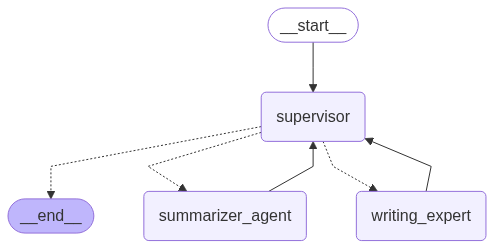

In [28]:
from IPython.display import Image

display(Image(publishing_team.get_graph().draw_mermaid_png()))

### Top level supervisor

In [38]:
high_level_supervisor = create_supervisor(
    [research_team, publishing_team],
    model=llm,
    prompt=(
        "You are a top-level supervisor managing multiple teams and agents.\n"
        "You manage the medical researcher for health-related insights and the finance researcher for financial data and stock analysis.\n"
        "For retrieving current events and real-time information, use the research_agent.\n"
        "For summarizing collected insights into concise and clear points, use the summarizer_agent.\n"
        "For preparing the final report or document, always hand off to the publishing_team.\n"
        "Within the publishing_team, use the pdf_writer_agent to write the final content into a PDF or text file."
    ),
    output_mode="full_history"
).compile("high_level_supervisor")

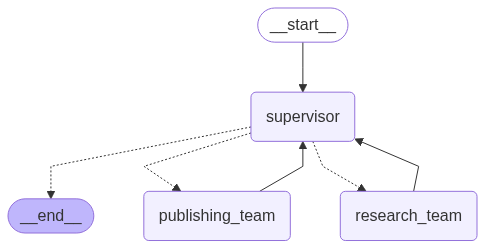

In [40]:

from IPython.display import Image

display(Image(high_level_supervisor.get_graph().draw_mermaid_png()))

In [44]:
from langchain_core.messages import HumanMessage

result = high_level_supervisor.invoke({
    "messages": [
        HumanMessage(content="Give me a brief report on the recent performance of Tesla's stock price, including major news that affected it. Also, summarize the impact of recent AI advancements on healthcare.")
    ]
})

# View output
for msg in result["messages"]:
    print(f"{msg.type.upper()} >>> {msg.content}\n")


AttributeError: 'str' object has no attribute 'config_specs'